In [1]:
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import misc
import collections
from matplotlib import pyplot as plt

In [2]:
def plot_roc_curve(fpr, tpr, title):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

def model_report(test, predict, y_pred_quant, model_name): 
    print('Accuracy Score of ' + model_name, accuracy_score(test, predict))
    fpr, tpr, thresholds = metrics.roc_curve(test, y_pred_quant, pos_label=1)
    print('AUC Score of ' + model_name, metrics.auc(fpr, tpr))
    print(classification_report(test, predict))
    plot_roc_curve(fpr, tpr, 'ROC Curve for {}'.format(model_name))
    
    
def logistic_regression_model(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    
    # Get the best parameter
    params = {'penalty':['l1','l2'],
              'solver': ['liblinear'],
             'C':[0.01, 0.1, 1, 10, 100],
             'class_weight':['balanced',None]}
    model = GridSearchCV(log, param_grid=params, cv=10, iid=True)
    
    # result of the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)[:, 1]
    print('The best parameter is ', model.best_params_)
    model_report(y_test, y_pred, y_pred_quant, "Logistic Regression")
    
    
def svc_model(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    svc = SVC()
    
    # Get the best parameter
    params = {'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['auto'], 'probability': [True]}
    model = GridSearchCV(svc, param_grid=params, cv=10, iid=True)
    
    # result of the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)[:, 1]
    print('The best parameter is ', model.best_params_)
    model_report(y_test, y_pred, y_pred_quant, "SVM")
    
    
def decision_tree_model(X_train, X_test, y_train, y_test):
    params = {"max_depth": [1, 2, 3, 4, None],
              "max_features": [1, 2, 3, 4, None],
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}
    tree = DecisionTreeClassifier()
    model = GridSearchCV(tree, param_grid=params, cv=10, iid=True)
    
    # result of the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)[:, 1]
    print('The best parameter is ', model.best_params_)
    model_report(y_test, y_pred, y_pred_quant, "Decision Tree")


In [3]:
def process_data(data):
    data['cp'] = data['cp'].astype('object')
    data['slope'] = data['slope'].astype('object')
    data['thal'] = data['thal'].astype('object')
    data['restecg'] = data['restecg'].astype('object')
    data = pd.get_dummies(data)
    return pd.DataFrame(data)

In [4]:
data = pd.read_csv('heart.csv')
X = data.drop('target', axis = 1)
Y = data['target']

# Use same seed to ensure split in a same way for unprocessed and processed data
seed = 42

# Normal Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

# Processed Data
X_pro = process_data(X)
X_train_pro, X_test_pro, y_train, y_test = train_test_split(X_pro, Y, test_size = 0.3, random_state=seed)

## Before Data Preprocessing

********************Logistic Regression*****************************
The best parameter is  {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Score of Logistic Regression 0.8131868131868132
AUC Score of Logistic Regression 0.8804878048780488
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

********************SVM*****************************
The best parameter is  {'gamma': 'auto', 'kernel': 'linear', 'probability': True}
Accuracy Score of SVM 0.8131868131868132
AUC Score of SVM 0.8721951219512195
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy             

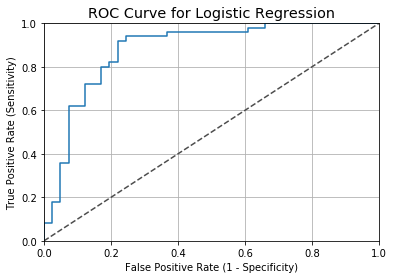

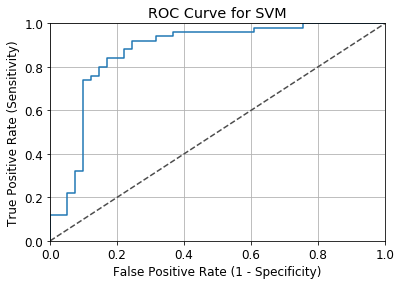

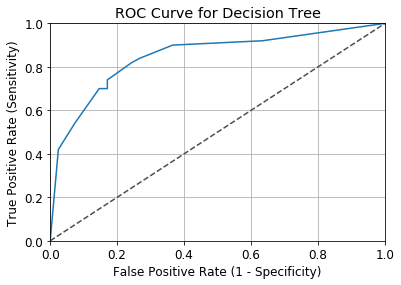

In [5]:
# Train the data without preprocessing
print("********************Logistic Regression*****************************")
logistic_regression_model(X_train, X_test, y_train, y_test)
print("********************SVM*****************************")
svc_model(X_train, X_test, y_train, y_test)
print("********************Decision Tree*****************************")
decision_tree_model(X_train, X_test, y_train, y_test)

## After Data Preprocessing

********************Logistic Regression*****************************
The best parameter is  {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score of Logistic Regression 0.8241758241758241
AUC Score of Logistic Regression 0.8985365853658536
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

********************SVM*****************************
The best parameter is  {'gamma': 'auto', 'kernel': 'linear', 'probability': True}
Accuracy Score of SVM 0.8241758241758241
AUC Score of SVM 0.8941463414634147
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.87      0.80      0.83        50

    accuracy             

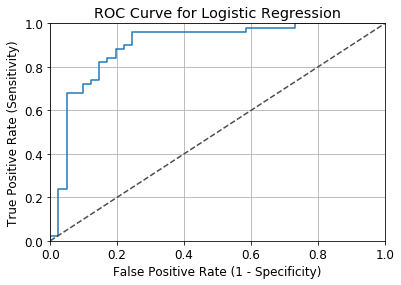

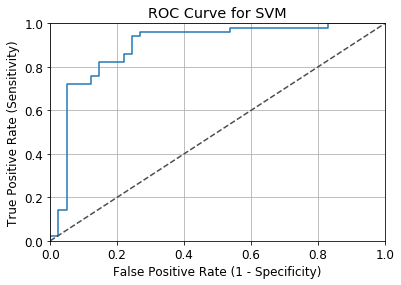

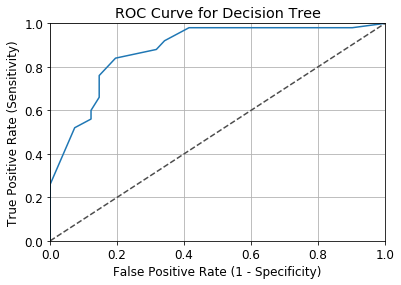

In [6]:
print("********************Logistic Regression*****************************")
logistic_regression_model(X_train_pro, X_test_pro, y_train, y_test)
print("********************SVM*****************************")
svc_model(X_train_pro, X_test_pro, y_train, y_test)
print("********************Decision Tree*****************************")
decision_tree_model(X_train_pro, X_test_pro, y_train, y_test)

## Calculate Feature Importance

In [7]:
#use best parameters we get from previous steps
best_log = LogisticRegression(
    penalty='l2',
    C=0.01,
    solver='liblinear',
    class_weight=None,
)
best_log.fit(X_train, y_train)
feature_importance = abs(best_log.coef_[0])
sorted_index = np.argsort(feature_importance)
sorted_features = []
for i in sorted_index:
    sorted_features.append(X.columns[i])
print("Sort features ascendingly based on feauture importance: ")
print(sorted_features)

Sort features ascendingly based on feauture importance: 
['chol', 'trestbps', 'fbs', 'age', 'restecg', 'thalach', 'slope', 'exang', 'sex', 'thal', 'oldpeak', 'ca', 'cp']
